In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from scipy.integrate import odeint
from scipy.optimize import minimize
import scipy.stats as st
from scipy import integrate
from lmfit import minimize, Parameters, Parameter, report_fit

pathName = os.getcwd()
print(pathName)

C:\Users\frank\GTREU\SIR


# Initialize Five States and Import Data

In [2]:
dates = ['3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20',
        '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20',
        '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20', '4/27/20', '4/28/20', '4/29/20', '4/30/20', '5/1/20', 
        '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20', '5/12/20', '5/13/20', '5/14/20', '5/15/20', '5/16/20', '5/17/20', '5/18/20', '5/19/20', '5/20/20', '5/21/20',
        '5/22/20', '5/23/20', '5/24/20', '5/25/20', '5/26/20', '5/27/20', '5/28/20', '5/29/20', '5/30/20', '5/31/20', '6/1/20', '6/2/20', '6/3/20', '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20',
        '6/12/20', '6/13/20', '6/14/20', '6/15/20', '6/16/20', '6/17/20', '6/18/20', '6/19/20', '6/20/20', '6/21/20', '6/22/20', '6/23/20', '6/24/20', '6/25/20', '6/26/20', '6/27/20', '6/28/20', '6/29/20', '6/30/20', '7/1/20', 
        '7/2/20', '7/3/20', '7/4/20', '7/5/20', '7/6/20', '7/7/20', '7/8/20', '7/9/20', '7/10/20', '7/11/20', '7/12/20', '7/13/20', '7/14/20', '7/15/20']

# Scrape CSV file from JHU Github

# Cases
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
df = pd.read_csv(url, index_col=0)

us_temp = df.loc[(df['Country_Region'] == 'US')]

# Deaths
url2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
dfDeaths = pd.read_csv(url2, index_col=0)

us_tempDeaths = dfDeaths.loc[(dfDeaths['Country_Region'] == 'US')]

# Recovered
url3 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
dfRec = pd.read_csv(url3, index_col=0)
us_tempRec = dfRec.loc[(dfRec['Country/Region'] == 'US')]

In [3]:
# Fill US array up with daily corona cases

popUS = 326690000

# United States
usa = []
k=0
tempI = 0
tempD = 0
tempR = 0
for i in dates:
    usaI = sum(us_temp[i]) - tempI
    usaD = sum(us_tempDeaths[i])
    usaR = sum(us_tempRec[i])
    tempusaR = sum(us_tempRec[i])
    tempusaI = sum(us_temp[i])
    tempusaD = sum(us_tempDeaths[i])
    usaS = popUS - tempusaR - tempusaI - tempusaD
    insert = [usaS, usaI, (tempusaD+tempusaR)]
    usa.append(insert)
    tempI = tempusaI
    tempD = tempusaD
    tempR = tempusaR
    k += 1    

# SIR Model

In [4]:
# beta is infection rate
# gamma is recovery/mortality rate

def SIR(y, t, beta, gamma):
    S, I, R = y
    N = S+I+R
    # Ordinary differential equations
    dS = (-beta * S * I) / N
    dI = ((beta * S * I) / N) - (gamma * I)
    dR = gamma * I
    return(dS, dI, dR)

# Parameter Fitting with Least-Squares

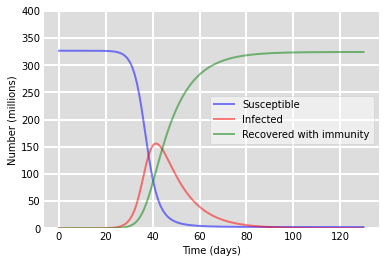

In [5]:
# Run SIR for US
N = popUS
I0 = 100
R0 = 0
S0 = N - I0 - R0

days = 130
gamma = 0.1
beta= 0.5

# Init parameters for optimization
params = Parameters()
params.add('beta', value=beta, min=0, max=5)
params.add('gamma', value=gamma, min=0, max=5)

t = np.linspace(0, days, days)
y0 = S0, I0, R0

# Integrate equations over t
def ode_sol(t, init, params):
    beta, gamma = params['beta'].value, params['gamma'].value
    out = odeint(SIR, init, t, args=(beta, gamma))
    return out

res = ode_sol(t, y0, params)
S, I, R = res.T

# Plot data on curves
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (millions)')
ax.set_ylim(0,400)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [6]:
def error(param, init, tspan, data):
    sol = ode_sol(tspan, init, param)

    return (sol[:, 0:3] - data).ravel()

params

name,value,initial value,min,max,vary
beta,0.50000000,0.5,0.00000000,5.00000000,True
gamma,0.10000000,0.1,0.00000000,5.00000000,True


In [7]:
# Fit model to United States

I0 = 100
R0 = 0
N0 = popUS
days = 91
S0 = N0 - I0 - R0
tspan = np.arange(0, days, 1)

data =  usa[0:days]

init = [S0, I0, R0]

# Fit the model
result = minimize(error, params, args=(init, tspan, data), method='leastsq')

In [8]:
# Check fitted parameters
result.params

name,value,standard error,relative error,initial value,min,max,vary
beta,2.85828791,0.06379108,(2.23%),0.5,0.00000000,5.00000000,True
gamma,2.78723503,0.06725630,(2.41%),0.1,0.00000000,5.00000000,True


In [9]:
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 120
    # data points      = 273
    # variables        = 2
    chi-square         = 5.6262e+13
    reduced chi-square = 2.0761e+11
    Akaike info crit   = 7116.07857
    Bayesian info crit = 7123.29752
[[Variables]]
    beta:   2.85828791 +/- 0.06379108 (2.23%) (init = 0.5)
    gamma:  2.78723503 +/- 0.06725630 (2.41%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(beta, gamma) =  1.000


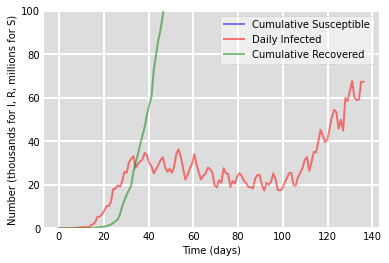

In [10]:
# Plot daily cases for United States
printUSS = [0]*len(dates)
printUSI = [0]*len(dates)
printUSR = [0]*len(dates)
k=0

for i in usa:
    printUSS[k] = i[0]/1000000
    printUSI[k] = i[1]/1000
    printUSR[k] = i[2]/1000
    k+=1

t = np.linspace(0, len(dates), len(dates))
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, printUSS, 'b', alpha=0.5, lw=2, label='Cumulative Susceptible')
ax.plot(t, printUSI, 'r', alpha=0.5, lw=2, label='Daily Infected')
ax.plot(t, printUSR, 'g', alpha=0.5, lw=2, label='Cumulative Recovered')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (thousands for I, R, millions for S)')
ax.set_ylim(0,100)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

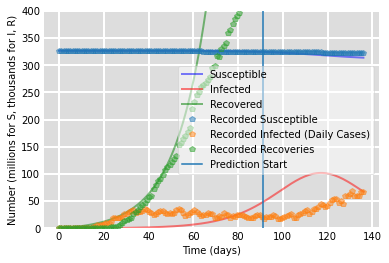

In [11]:
# Plot SIR model using fitted parameters for US
I0 = 100
R0 = 0
N0 = popUS
S0 = N0 - I0 - R0
days = 136
t = np.linspace(0, days, days)
y0 = S0, I0, R0
res = ode_sol(t, y0, result.params)
S, I, R = res.T

# Plot data on curves
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, printUSS, 'p', alpha=0.5, lw=2, label='Recorded Susceptible')
ax.plot(t, printUSI, 'p', alpha=0.5, lw=2, label='Recorded Infected (Daily Cases)')
ax.plot(t, printUSR, 'p', alpha=0.5, lw=2, label='Recorded Recoveries')
ax.axvline(x=91, ymin=0, ymax=500, label="Prediction Start")
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (millions for S, thousands for I, R)')
ax.set_ylim(0,400)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error

# Use two methods for calculating MSE for sanity check

print(mean_squared_error(printUSI[91:136],I[91:136]/1000))

MSE = np.square(np.subtract(printUSI[91:136],I[91:136]/1000)).mean()

print(MSE)

2487.821355117364
2487.821355117364


# Generate CSVs of Predictions

In [29]:
# Fit model to United States with different prediction start dates

I0 = 100
R0 = 0
N0 = popUS
S0 = N0 - I0 - R0
init = [S0, I0, R0]

# Init empty predictions dictionary
predictions = {}

for i in range(91, len(dates)):
    days = i
    tspan = np.arange(0, days, 1)
    data =  usa[0:days]

    # Fit the model
    result = minimize(error, params, args=(init, tspan, data), method='leastsq')
    
    days = i + 7
    t = np.linspace(0, days, days)
    y0 = S0, I0, R0
    res = ode_sol(t, y0, result.params)
    S, I, R = res.T
    
    # Add these prediction infected values into dictionary
    predictions[dates[i]] = I[(days-7):days]

In [14]:
from datetime import datetime

# Put all the data into the desired format
quant = []
loca = []
targ = []
forc = []
poin = []
end_date = []
keys = []

for key, value in predictions.items():
    keys.append(key)

forc_keys = keys + ["7/16/20", "7/17/20", "7/18/20", "7/19/20", "7/20/20", "7/21/20", "7/22/20", "7/23/20"]
    
# Loop through and situate everything correctly
j = 0
for i in range(len(keys)):
    x = datetime.strptime(keys[i], '%m/%d/%y')
    forc_date = x.strftime('%Y-%m-%d')
    point_date = keys[i]
    for k in range(7):
        quant.append("NA")
        loca.append("US")
        targ.append("1 wk ahead inc case")
        forc.append(forc_date)
        # Make sure point predictions are end dates are iterated
        poin.append(predictions[point_date][k])
        y = datetime.strptime(forc_keys[j+k], '%m/%d/%y')
        end_date.append(y.strftime('%Y-%m-%d'))
    j = j + 1
        
# Instantiate the output CSV dictionary
output_csv = {"location" : loca, 
              "target" : targ,
             "target_end_date" : end_date,
             "forecast_date" : forc,
             "point" : poin,
             "quantile" : quant}

# convert to pandas dataframe for easy transfer to CSV
out = pd.DataFrame(output_csv)

In [30]:
# Iterate through and create separate CSV files for each forecast date
# Also reformat dates to correct format
for i in dates[91:len(dates)]:
    z = datetime.strptime(i, '%m/%d/%y')
    z_date = z.strftime('%Y-%m-%d')
    to_file = out[out["forecast_date"] == z_date]
    to_file.to_csv(f'{z_date}-Basic-SIR.csv', index=False) 

In [28]:
# Example of one of the CSV files
out[out["forecast_date"] == "2020-06-20"]

,location,target,target_end_date,forecast_date,point,quantile
133,US,1 wk ahead inc case,2020-06-20,2020-06-20,65865.127227,NA
134,US,1 wk ahead inc case,2020-06-21,2020-06-20,68520.303023,NA
135,US,1 wk ahead inc case,2020-06-22,2020-06-20,71197.329140,NA
136,US,1 wk ahead inc case,2020-06-23,2020-06-20,73887.132111,NA
137,US,1 wk ahead inc case,2020-06-24,2020-06-20,76579.853064,NA
138,US,1 wk ahead inc case,2020-06-25,2020-06-20,79264.878531,NA
139,US,1 wk ahead inc case,2020-06-26,2020-06-20,81930.886381,NA
